# Imports

In [2]:
#!pip install lifelines

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from lifelines import KaplanMeierFitter
from lifelines.statistics import multivariate_logrank_test

# Load dataset

In [4]:
dataset = pd.read_csv("data/solder.csv")
dataset.head()  

,Opening,Solder,Mask,PadType,Panel,skips
0,L,Thick,A1.5,W4,1,0
1,L,Thick,A1.5,W4,2,0
2,L,Thick,A1.5,W4,3,0
3,L,Thick,A1.5,D4,1,0
4,L,Thick,A1.5,D4,2,0


trate with binning Solder column:

In [5]:
#transform survival variable
dataset["Solder"] = np.where(dataset["Solder"] == "Thin", 1, 0)
dataset.head()

,Opening,Solder,Mask,PadType,Panel,skips
0,L,0,A1.5,W4,1,0
1,L,0,A1.5,W4,2,0
2,L,0,A1.5,W4,3,0
3,L,0,A1.5,D4,1,0
4,L,0,A1.5,D4,2,0


# Visualizer data

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Opening  900 non-null    object
 1   Solder   900 non-null    int64 
 2   Mask     900 non-null    object
 3   PadType  900 non-null    object
 4   Panel    900 non-null    int64 
 5   skips    900 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 42.3+ KB


- Small dataset;
- 6 columns;
- 3 string and 3 int coluns.

In [6]:
dataset.describe()

,Solder,Panel,skips
count,900.000000,900.000000,900.00000
mean,0.500000,2.000000,5.53000
std,0.500278,0.816951,8.44706
min,0.000000,1.000000,0.00000
25%,0.000000,1.000000,0.00000
50%,0.500000,2.000000,2.00000
75%,1.000000,3.000000,7.00000
max,1.000000,3.000000,48.00000


The KME will with Solder is Thin or not and number of skips.

# Kaplan-Meier Estimator

In [7]:
#KME
model = KaplanMeierFitter()
model.fit(durations = dataset.skips,
          event_observed = dataset.Solder)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 900 total observations, 450 right-censored observations>

# Visuliazation

Text(0.5, 0, 'Skips')

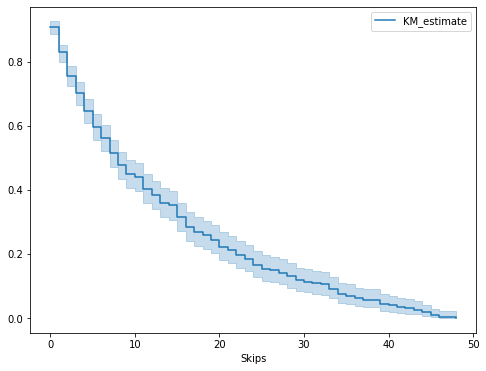

In [8]:
model.plot(figsize = (8,6))
plt.xlabel("Skips")

In [9]:
dataset.Panel.unique()

array([1, 2, 3])

# Openning

Get subsets

In [19]:
opening_l = dataset[dataset['Opening'] == "L"]
opening_m = dataset[dataset['Opening'] == "M"]
opening_s = dataset[dataset['Opening'] == "S"]

creates a KME

In [21]:
# Male
model_opening_l = KaplanMeierFitter()
model_opening_l.fit(durations=opening_l.skips,
                    event_observed=opening_l.Solder)
# Female
model_opening_m = KaplanMeierFitter()
model_opening_m.fit(durations=opening_m.skips,
                    event_observed=opening_m.Solder)

# Male
model_opening_s = KaplanMeierFitter()
model_opening_s.fit(durations=opening_s.skips,
                    event_observed=opening_s.Solder)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 300 total observations, 150 right-censored observations>

plot survival curve

Text(0, 0.5, 'Survival')

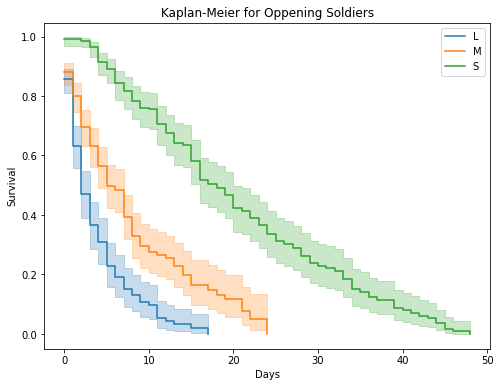

In [22]:
model_opening_l.plot(figsize=(8, 6), label="L")
model_opening_m.plot(label="M")
model_opening_s.plot(label="S")

plt.title("Kaplan-Meier for Oppening Soldiers")
plt.xlabel("Days")
plt.ylabel("Survival")

# Log Rank Test

In [12]:
# Test with 3 coluns in multivariate longrank test
multivariate_logrank_test(dataset.skips,
                          dataset.Panel,
                          dataset.Solder)

/opt/homebrew/lib/python3.9/site-packages/lifelines/statistics.py:143: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return self.summary.to_latex()


<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
           6.84 0.03      4.93